In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import time
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 

In [2]:
iris = load_iris()
X, y = iris.data[:-1, :], iris.target[:-1] 
y = pd.get_dummies(y).values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [3]:
num_features = X_train.shape[1] 
print(f"Num features: {num_features}") 

num_labels = y_train.shape[1] 
print(f"Num labels: {num_labels}") 

Num features: 4
Num labels: 3


In [4]:
X_train = tf.constant(X_train, dtype='float32') 
y_train = tf.constant(y_train, dtype="float32") 
X_test = tf.constant(X_test, dtype="float32") 
y_test = tf.constant(y_test, dtype="float32")

In [5]:
# Set model weights and biases 
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input, 3 classes 
b = tf.Variable(tf.zeros([3]))  # 3-dimensional output 


In [7]:
# Randomly sample from a normal distribution with a standard deviation 0.01 
weights = tf.Variable(tf.random.normal([num_features, num_labels], mean=0., stddev=0.01, name="weights"), dtype="float32") 
bias = tf.Variable(tf.random.normal([1, num_labels], mean=0, stddev=0.01, name="bias")) 

In [14]:
# Logistic Regression model 
def logistic_regression(x): 
    apply_weights_op = tf.matmul(x, weights, name="apply_weights") 
    add_bias_OP = tf.add(apply_weights_op, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

In [15]:
# Cost Function 
epochs = 700 

learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0008, 
    decay_steps=X_train.shape[0], 
    decay_rate=0.95, 
    staircase=True
)

In [16]:
loss_object = tf.keras.losses.MeanSquaredLogarithmicError() 
optimizer = tf.keras.optimizers.SGD(learning_rate) 

In [17]:
# Accuracy Metric 
def accuracy(y_pred, y_true): 
    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32)) 

In [18]:
# Optimization 
def run_optimization(x, y): 
    with tf.GradientTape() as g: 
        pred = logistic_regression(x) 
        loss = loss_object(pred, y) 
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias])) 

In [19]:
# Initialize Reporting Variabls 
display_step = 10 
epoch_values = [] 
accuracy_values = [] 
loss_values = [] 
loss = 0 
diff = 1

# Training epochs 
for i in range(epochs): 
    if i > 1 and diff < 0.0001: 
        print(f"Change in loss{diff} convergence")
        break 
    else: 
        # Run training step 
        run_optimization(X_train, y_train) 
        
        # Report occasional stats 
        if i % display_step == 0: 
            # Add epoch to epoch_values 
            epoch_values.append(i) 
            pred = logistic_regression(X_test)
            new_loss = loss_object(pred, y_test) 
            loss_values.append(new_loss) 
            # Generate accuracy stats on test data 
            acc = accuracy(pred, y_test) 
            accuracy_values.append(acc) 

            # Re assign values for variables 
            diff = abs(new_loss - loss)
            loss = new_loss 
            # Generate print statements 
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, new_loss, diff))

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())


step 0, training accuracy 0.288889, loss 0.13681, change in loss 0.13681
step 10, training accuracy 0.288889, loss 0.136272, change in loss 0.000537977
step 20, training accuracy 0.288889, loss 0.135742, change in loss 0.000529885
step 30, training accuracy 0.288889, loss 0.13522, change in loss 0.000521749
step 40, training accuracy 0.288889, loss 0.134707, change in loss 0.000513703
step 50, training accuracy 0.288889, loss 0.134201, change in loss 0.000505626
step 60, training accuracy 0.288889, loss 0.133703, change in loss 0.000497609
step 70, training accuracy 0.288889, loss 0.133214, change in loss 0.000489622
step 80, training accuracy 0.288889, loss 0.132732, change in loss 0.000481695
step 90, training accuracy 0.288889, loss 0.132258, change in loss 0.000473812
step 100, training accuracy 0.288889, loss 0.131792, change in loss 0.000465944
step 110, training accuracy 0.288889, loss 0.13135, change in loss 0.000442252
step 120, training accuracy 0.288889, loss 0.130922, chang

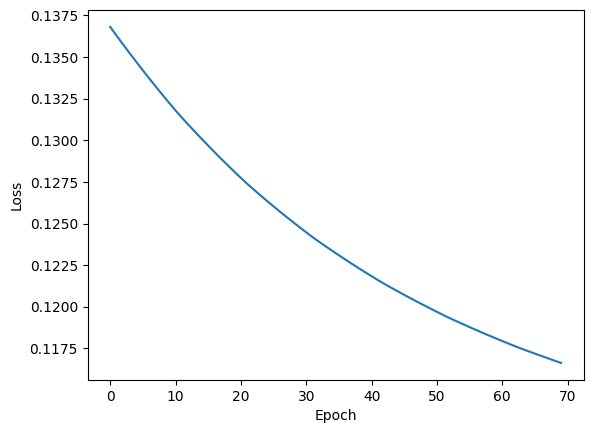

In [20]:
%matplotlib inline 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()